In [152]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In this file, we explore different ways to detrend a time series containing housing prices for a single region (state or county). Though we only show the results for a single region, we tested each method on many regions and compared the results.

The time series data for housing prices in a region is not covariance stationary, so we want to decompose/detrend our data into a time series that is more likely to be covariance stationary and therefore is more suitable for analysis with ARIMA and the Kalman Filter. We compare results from detrending by moving average, differencing, and OLS. We found that detrending the time series by subtracting off a 12-month moving average yielded the best results.

In [153]:
# helper function to detrend a given time series using moving averages, which we found to be the best method
def detrend(time_series):
    '''Compute the detrended, covariance stationary version of a time series containing 
       housing price data for a single region using a moving average.
        Parameters:
            time_series (ndarray) : the original time series
        Returns:
            (ndarray) : the detrended time series 
    '''
    def _moving_average(series, m=12):
        '''Compute the length-m moving average of a series
        '''
        if len(series) < m:
            raise ValueError("Window size cannot be larger than the array length.")
        ret = np.cumsum(series, dtype=float)
        ret[m:] = ret[m:] - ret[:-m]
        return ret[m - 1:] / m
    
    ma = _moving_average(time_series)
    return time_series - ma

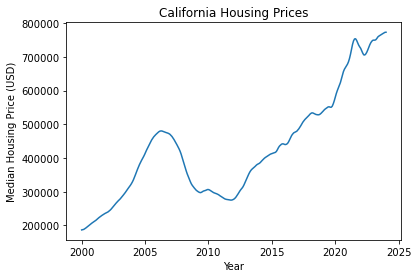

In [154]:
# read and plot the original time series
df = pd.read_csv("Data_Files/price_by_state_cleaned.csv")
label_df = pd.read_csv("Data_Files/state_data_labels.csv")
state = "California"

t_vals = df["Unnamed: 0"].values
time_series = df[state].values
plt.plot(np.linspace(2000, 2024, len(time_series)), time_series)
plt.xlabel("Year")
plt.ylabel("Median Housing Price (USD)")
plt.title(f"{state} Housing Prices")
plt.show()

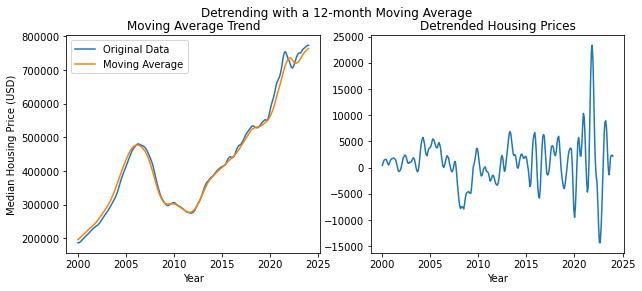

In [155]:
# detrend using yearly moving average
def moving_average(arr, window_size):
    if len(arr) < window_size:
        raise ValueError("Window size cannot be larger than the array length.")
    
    ret = np.cumsum(arr, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size

ma = moving_average(time_series, 12)

# plot the trend and detrended time series
fig = plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(np.linspace(2000, 2024, len(time_series)), time_series, label="Original Data")
plt.plot(np.linspace(2000, 2024, len(ma)), ma, label="Moving Average")
plt.legend()
plt.title("Moving Average Trend")
plt.xlabel("Year")
plt.ylabel("Median Housing Price (USD)")

plt.subplot(122)
plt.plot(np.linspace(2000, 2024, len(ma)), time_series[6:-5] - ma)
plt.title("Detrended Housing Prices")
plt.xlabel("Year")

plt.suptitle("Detrending with a 12-month Moving Average")
plt.show()

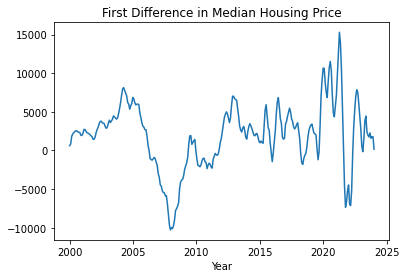

In [156]:
# detrend by differencing
difference = np.diff(time_series)

# plot
plt.plot(np.linspace(2000, 2024, len(difference)), difference)
plt.xlabel("Year")
plt.title("First Difference in Median Housing Price")

plt.show()

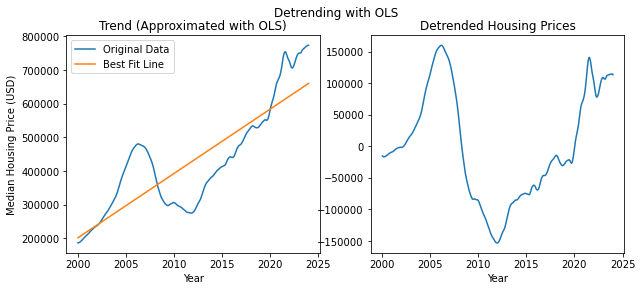

In [157]:
# detrend using linear regression
x = np.linspace(2000, 2024, len(time_series))
regressor = LinearRegression().fit(x.reshape(-1, 1), time_series.reshape(-1, 1))
best_fit_line = regressor.coef_[0][0] * x + regressor.intercept_[0]

# plot results of detrended data
fig = plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(np.linspace(2000, 2024, len(time_series)), time_series, label="Original Data")
plt.plot(np.linspace(2000, 2024, len(time_series)), best_fit_line, label="Best Fit Line")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Median Housing Price (USD)")
plt.title("Trend (Approximated with OLS)")

plt.subplot(122)
plt.plot(np.linspace(2000, 2024, len(time_series)), time_series - best_fit_line)
plt.xlabel("Year")
plt.title("Detrended Housing Prices")

plt.suptitle("Detrending with OLS")
plt.show()
